In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Dados históricos das ações do Google (GOOGL) nos últimos 5 anos
data = yf.download('GOOGL', start='2018-06-06', end='2023-06-06')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Pré-processar os dados
data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [ ]:
# Preparar os dados sequenciais
def create_sequences(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:i+steps])
        y.append(data[i+steps])
    return np.array(X), np.array(y)

In [ ]:
# Sequências para treinamento e teste
steps = 10
X_train, y_train = create_sequences(train_data, steps)
X_test, y_test = create_sequences(test_data, steps)

In [ ]:
# Construir e treinar o modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
63/63 [==============================] - 2s 7ms/step - loss: 0.0296
Epoch 2/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 3/10
63/63 [==============================] - 0s 7ms/step - loss: 9.0645e-04
Epoch 4/10
63/63 [==============================] - 0s 8ms/step - loss: 8.4369e-04
Epoch 5/10
63/63 [==============================] - 1s 10ms/step - loss: 7.7005e-04
Epoch 6/10
63/63 [==============================] - 1s 10ms/step - loss: 7.8932e-04
Epoch 7/10
63/63 [==============================] - 1s 10ms/step - loss: 7.8840e-04
Epoch 8/10
63/63 [==============================] - 1s 9ms/step - loss: 7.3503e-04
Epoch 9/10
63/63 [==============================] - 1s 9ms/step - loss: 7.5845e-04
Epoch 10/10
63/63 [==============================] - 0s 7ms/step - loss: 7.2774e-04


In [ ]:
# Avaliar o modelo
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

8/8 [==============================] - 0s 3ms/step - loss: 0.0015
Loss: 0.0015157103771343827


In [ ]:
# Realizar previsões
predictions = model.predict(X_test)

8/8 [==============================] - 0s 3ms/step


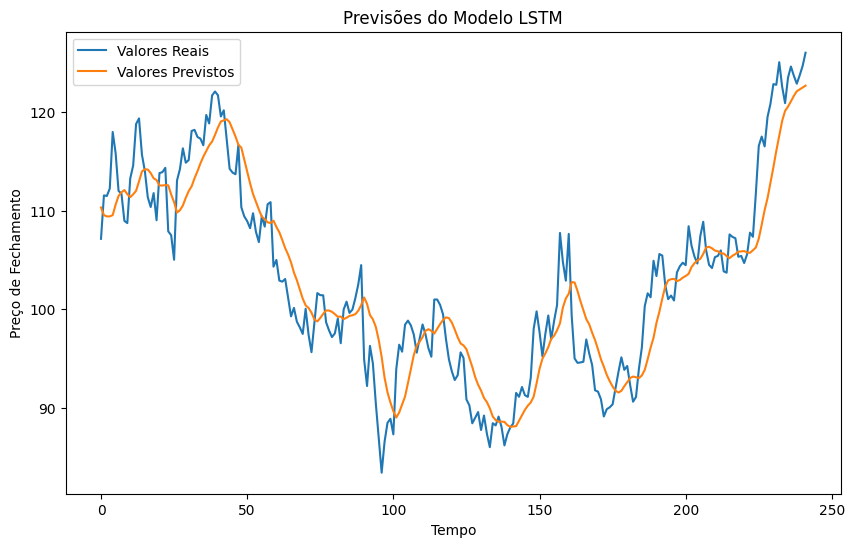

In [ ]:
# Desnormalizar os valores previstos e reais
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Protar o gráfico das previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores Reais')
plt.plot(predictions, label='Valores Previstos')
plt.xlabel('Tempo')
plt.ylabel('Preço de Fechamento')
plt.title('Previsões do Modelo LSTM')
plt.legend()
plt.show()

In [ ]:
# Calcular MAE e MSE
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)

MAE: 3.196338874249419
MSE: 15.34105860594129
